#### Importando bibliotecas

In [167]:
#bibliotecas

import pandas as pd
import numpy as np

In [168]:
#abrir csv

df = pd.read_csv('zomato.csv')

data = df.copy

#### Inspeção e tratamento de dados

In [169]:
#inspeção de dimensão do dataframe

df.shape

(7527, 21)

In [170]:
#inspeção geral

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7527 entries, 0 to 7526
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         7527 non-null   int64  
 1   Restaurant Name       7527 non-null   object 
 2   Country Code          7527 non-null   int64  
 3   City                  7527 non-null   object 
 4   Address               7527 non-null   object 
 5   Locality              7527 non-null   object 
 6   Locality Verbose      7527 non-null   object 
 7   Longitude             7527 non-null   float64
 8   Latitude              7527 non-null   float64
 9   Cuisines              7512 non-null   object 
 10  Average Cost for two  7527 non-null   int64  
 11  Currency              7527 non-null   object 
 12  Has Table booking     7527 non-null   int64  
 13  Has Online delivery   7527 non-null   int64  
 14  Is delivering now     7527 non-null   int64  
 15  Switch to order menu 

In [171]:
#inspeção de dados nulos

df.isna().sum()

Restaurant ID            0
Restaurant Name          0
Country Code             0
City                     0
Address                  0
Locality                 0
Locality Verbose         0
Longitude                0
Latitude                 0
Cuisines                15
Average Cost for two     0
Currency                 0
Has Table booking        0
Has Online delivery      0
Is delivering now        0
Switch to order menu     0
Price range              0
Aggregate rating         0
Rating color             0
Rating text              0
Votes                    0
dtype: int64

In [172]:
#inspeção dos nomes das colunas

df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [173]:
#função para padronizar o nome das colunas

def rename_columns(data):
    old_cols = df.columns
    new_cols = []
    
    for col in old_cols:
        new = col.lower().replace(' ', '_')
        new_cols.append(new)
    
    df.columns = new_cols
        
    return df

In [174]:
#aplicando função

df = rename_columns(df)
df.columns

Index(['restaurant_id', 'restaurant_name', 'country_code', 'city', 'address',
       'locality', 'locality_verbose', 'longitude', 'latitude', 'cuisines',
       'average_cost_for_two', 'currency', 'has_table_booking',
       'has_online_delivery', 'is_delivering_now', 'switch_to_order_menu',
       'price_range', 'aggregate_rating', 'rating_color', 'rating_text',
       'votes'],
      dtype='object')

In [175]:
#criar coluna dos países

def country_name(name):
    country_name = {
         1: "India",
        14: "Australia",
        30: "Brazil",
        37: "Canada",
        94: "Indonesia",
        148: "New Zeland",
        162: "Philippines",
        166: "Qatar",
        184: "Singapure",
        189: "South Africa",
        191: "Sri Lanka",
        208: "Turkey",
        214: "United Arab Emirates",
        215: "England",
        216: "United States of America"
        }
    
    return country_name[name]

In [176]:
#aplicando função

df['country_name'] = df['country_code'].apply(lambda x: country_name(x))

In [177]:
#remover mais de uma culinária na mesma linha

df['cuisines_null'] = df['cuisines'].fillna('null') #trocando o np.nan (float) por null(str)
df['cuisines_null'] = df['cuisines_null'].apply(lambda x: x.split(',')[0]) #salvando tudo na nova coluna

In [178]:
#função para alterar coluna de cores

def color_name(color_code):
    colors = {
        "3F7E00": "darkgreen",
        "5BA829": "green",
        "9ACD32": "lightgreen",
        "CDD614": "orange",
        "FFBA00": "red",
        "CBCBC8": "darkred",
        "FF7800": "darkred",
        }
    return colors[color_code]

In [179]:
#aplicando função

df['rating_color'] = df['rating_color'].apply(lambda x: color_name(x))

In [180]:
#função para alterar dados numéricos das coluna 'has_online_delivery', 'is_delivering_now'

def number_name(number):
    numbers = {0: 'yes', 1: 'no'}
    
    return numbers[number]

In [181]:
#aplicação da função

df['has_online_delivery'] = df['has_online_delivery'].apply(lambda x: number_name(x))

In [182]:
#aplicação da função

df['is_delivering_now'] = df['is_delivering_now'].apply(lambda x: number_name(x))

In [183]:
#classificar coluna 'price_range'

def create_price_tye(price_range):
    if price_range == 1:
        return 'cheap'
    elif price_range == 2:
        return 'normal'
    elif price_range == 3:
        return 'expensive'
    else:
        return 'gourmet'
    
    return price_range

In [184]:
#aplicação da função

df['price_range'] = df['price_range'].apply(lambda x: create_price_tye(x))

In [185]:
#checando se os tipos de dados estão corretos

df.dtypes

restaurant_id             int64
restaurant_name          object
country_code              int64
city                     object
address                  object
locality                 object
locality_verbose         object
longitude               float64
latitude                float64
cuisines                 object
average_cost_for_two      int64
currency                 object
has_table_booking         int64
has_online_delivery      object
is_delivering_now        object
switch_to_order_menu      int64
price_range              object
aggregate_rating        float64
rating_color             object
rating_text              object
votes                     int64
country_name             object
cuisines_null            object
dtype: object

In [186]:
#inspeção estatística geral

df.describe().T.round()

,count,mean,std,min,25%,50%,75%,max
restaurant_id,7527.0,10556892.0,7075141.0,549.0,3500060.0,7701457.0,17147150.0,19040277.0
country_code,7527.0,93.0,99.0,1.0,1.0,30.0,214.0,216.0
longitude,7527.0,34.0,77.0,-123.0,-4.0,74.0,80.0,175.0
latitude,7527.0,19.0,23.0,-41.0,13.0,25.0,32.0,56.0
average_cost_for_two,7527.0,7152.0,290607.0,0.0,60.0,290.0,600.0,25000017.0
has_table_booking,7527.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
switch_to_order_menu,7527.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aggregate_rating,7527.0,4.0,1.0,0.0,4.0,4.0,4.0,5.0
votes,7527.0,616.0,1128.0,0.0,152.0,335.0,663.0,41333.0


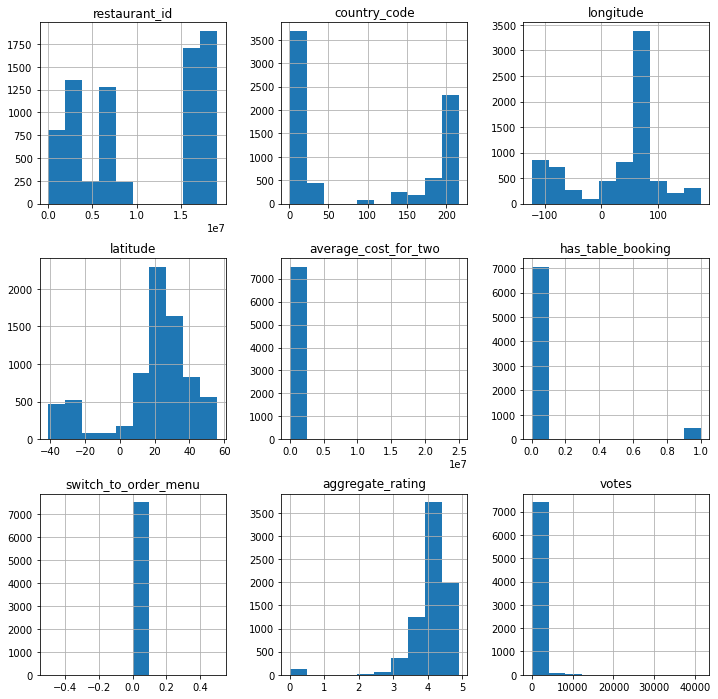

In [187]:
#inspeção estatística geral

df.hist(figsize=(12,12));

In [188]:
#inspeção geral final

df.head()

,restaurant_id,restaurant_name,country_code,city,address,locality,locality_verbose,longitude,latitude,cuisines,...,has_online_delivery,is_delivering_now,switch_to_order_menu,price_range,aggregate_rating,rating_color,rating_text,votes,country_name,cuisines_null
0,6310675,Mama Lou's Italian Kitchen,162,Las Piñas City,"Block 1, Lot 36, Tropical Avenue Corner Tropic...",BF International,"BF International, Las Piñas City",121.009787,14.447615,Italian,...,yes,yes,0,expensive,4.6,darkgreen,Excellent,619,Philippines,Italian
1,6310675,Mama Lou's Italian Kitchen,162,Las Piñas City,"Block 1, Lot 36, Tropical Avenue Corner Tropic...",BF International,"BF International, Las Piñas City",121.009787,14.447615,Italian,...,yes,yes,0,expensive,4.6,darkgreen,Excellent,619,Philippines,Italian
2,6314542,Blackbird,162,Makati City,"Nielson Tower, Ayala Triangle Gardens, Salcedo...","Ayala Triangle Gardens, Salcedo Village, Makat...","Ayala Triangle Gardens, Salcedo Village, Makat...",121.024562,14.556042,"European, Asian",...,yes,yes,0,gourmet,4.7,darkgreen,Excellent,469,Philippines,European
3,6301293,Banapple,162,Makati City,"Ayala Triangle Gardens, Salcedo Village, Makat...","Ayala Triangle Gardens, Salcedo Village, Makat...","Ayala Triangle Gardens, Salcedo Village, Makat...",121.023171,14.556196,"Filipino, American, Italian, Bakery",...,yes,yes,0,expensive,4.4,green,Very Good,867,Philippines,Filipino
4,6315689,Bad Bird,162,Makati City,"Hole In The Wall, Floor 4, Century City Mall, ...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027708,14.565899,American,...,yes,yes,0,expensive,4.4,green,Very Good,858,Philippines,American


In [189]:
#salvar csv

df.to_csv('zomato.csv')